<p>
  Data Science Bootcamp <br>
  Capstone - Sprint 2<br>
  Xavier Toledo<br>
</p>

# Water access analysis

Water has become a scarce resource in many communities across Canada. For my capstone project, I will analyze available data and leverage machine learning to predict the effects of different stressors. My goal is to help: 1) Corporations optimize their consumption, 2) Non-profit organizations allocate resources to mitigate human impact, and 3) Federal and Provincial government entities plan infrastructure projects more efficiently.



# Table of Contents
* [Part 1 - Data Cleaning](#p1)
    * [Section 1.1](#s1_1)
    * [Section 1.2](#s1_2)
* [Part 2 - Exploratory Data Analysis](#p2)
    * [Section 2.1](#s2_1)
    * [Section 2.2](#s2_2)
* [Part 3 - Statistical Analysis](#p3)
    * [Section 3.1](#s3_1)
    * [Section 3.2](#s3_2)
* [Part 4 - Machine Learning](#p4)
    * [Section 4.1](#s4_1)
    * [Section 4.2](#s4_2)
* [Part 5 - TBD](#p5)
    * [Section 5.1](#s5_1)
    * [Section 5.2](#s5_2)
* [Part 6 - TBD](#p6)
    * [Section 6.1](#s6_1)
    * [Section 6.2](#s6_2)
* [Part 7 - TBD](#p7)
    * [Section 7.1](#s7_1)
    * [Section 7.2](#s7_2)


# Part 1 - Data Loading and Cleaning <a class="anchor" id="p1"></a>

### Section 1.1 - <a id="s1_1"></a>Data collection

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy.stats import f_oneway
from scipy import stats
from scipy.stats import chi2
import numpy as np

In [2]:
# Colab

from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# Colab

#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Water-Qual-Eau-Fraser-2000-present.csv', index_col=0)


Importing data

In [4]:
# Define the path with .csv files
import os
path = '/content/drive/MyDrive/Colab Notebooks/Data/'
extension = '.csv'

In [5]:
# Creating a list of files
files = [file for file in os.listdir(path) if file.endswith(extension)]

In [6]:
import chardet

# Importing various files into pandas
dfs = []
for file in files:
    try:
        df = pd.read_csv(os.path.join(path, file), encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(os.path.join(path, file), encoding='latin1')
        except UnicodeDecodeError:
            df = pd.read_csv(os.path.join(path, file), encoding='ISO-8859-1')
    dfs.append(df)


<ipython-input-6-7e27dedba937>:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, file), encoding='utf-8')
<ipython-input-6-7e27dedba937>:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, file), encoding='utf-8')
<ipython-input-6-7e27dedba937>:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, file), encoding='utf-8')


In [120]:
# df = pd.read_csv(os.path.join(path, file), encoding=encoding)

In [7]:
# Concatenating files into a single dataframe
df1 = pd.concat(dfs, ignore_index=True)

In [8]:
dfv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Water-Qual-Eau-VariableInfo.csv', index_col=0)
dfv.head()

,VARIABLE_CODE,VARIABLE,VARIABLE_FR,VARIABLE_TYPE,VARIABLE_TYPE_FR,UNIT_UNITÉ,UNIT_NAME,UNITÉ_NOM,METHOD_CODE,METHOD_TITLE,MÉTHODE_TITRE
VMV_CODE,,,,,,,,,,,
100081,371,ALUMINUM EXTRACTABLE,ALUMINIUM EXTRACTIBLE,METAL,MÉTAUX,MG/L,MILLIGRAM PER LITER,MILLIGRAMME PAR LITRE,2628.0,EXTRACTABLE METALS BY INDUCTIVELY COUPLED ARGO...,MÉTAUX EXTRACTIBLES PAR ICAP
100082,387,BARIUM EXTRACTABLE,BARYUM EXTRACTIBLE,METAL,MÉTAUX,MG/L,MILLIGRAM PER LITER,MILLIGRAMME PAR LITRE,2628.0,EXTRACTABLE METALS BY INDUCTIVELY COUPLED ARGO...,MÉTAUX EXTRACTIBLES PAR ICAP
100083,392,BERYLLIUM EXTRACTABLE,BÉRYLLIUM EXTRACTIBLE,METAL,MÉTAUX,MG/L,MILLIGRAM PER LITER,MILLIGRAMME PAR LITRE,2628.0,EXTRACTABLE METALS BY INDUCTIVELY COUPLED ARGO...,MÉTAUX EXTRACTIBLES PAR ICAP
100084,410,CADMIUM EXTRACTABLE,CADMIUM EXTRACTIBLE,METAL,MÉTAUX,MG/L,MILLIGRAM PER LITER,MILLIGRAMME PAR LITRE,2628.0,EXTRACTABLE METALS BY INDUCTIVELY COUPLED ARGO...,MÉTAUX EXTRACTIBLES PAR ICAP
100085,454,COBALT EXTRACTABLE,COBALT EXTRACTIBLE,METAL,MÉTAUX,MG/L,MILLIGRAM PER LITER,MILLIGRAMME PAR LITRE,2628.0,EXTRACTABLE METALS BY INDUCTIVELY COUPLED ARGO...,MÉTAUX EXTRACTIBLES PAR ICAP


In [9]:
dfn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Water-Qual-Eau-Sites-National.csv', index_col=0)
dfn.head()

,SITE_NAME,SITE_NOM_FR,SITE_TYPE,SITE_DESC,SITE_DESC_FR,LATITUDE,LONGITUDE,DATUM,PROV_TERR,PROV_TERR_FR,PEARSEDA,PEARSEDA_FR,OCEANDA,OCEANDA_FR,DATA_URL,DATA_URL_FR,OPEN_DATA_URL
SITE_NO,,,,,,,,,,,,,,,,,
00000072,BEAUHARNOIS CANAL AT RTE 132 BRIDGE IN VALLEYF...,CANAL DE BEAUHARNOIS AU PONT-ROUTE 132 À VALLE...,RIVER OR STREAM/RIVIÈRE OU RUISSEAU,NaN,NaN,45.2241,-74.1156,NAD83,QUE.,QC,ST. LAWRENCE,SAINT-LAURENT,ATLANTIC OCEAN,OCÉAN ATLANTIQUE,NaN,HTTP://WWW.MDDELCC.GOUV.QC.CA/EAU/ATLAS_INTERA...,HTTPS://DATA-DONNEES.EC.GC.CA/DATA/SUBSTANCES/...
00000075,ST.LAWRENCE RIVER WATER INTAKE AT THE WATER PL...,FLEUVE SAINT-LAURENT À LA PRISE D'EAU DE L'USI...,RIVER OR STREAM/RIVIÈRE OU RUISSEAU,NaN,NaN,45.8558,-73.2439,NAD83,QUE.,QC,ST. LAWRENCE,SAINT-LAURENT,ATLANTIC OCEAN,OCÉAN ATLANTIQUE,NaN,HTTP://WWW.MDDELCC.GOUV.QC.CA/EAU/ATLAS_INTERA...,HTTPS://DATA-DONNEES.EC.GC.CA/DATA/SUBSTANCES/...
00000078,ST.LAWRENCE RIVER WATER INTAKE AT THE WATER PL...,FLEUVE SAINT-LAURENT À LA PRISE D'EAU DE L'USI...,RIVER OR STREAM/RIVIÈRE OU RUISSEAU,NaN,NaN,45.4129,-73.6347,NAD83,QUE.,QC,ST. LAWRENCE,SAINT-LAURENT,ATLANTIC OCEAN,OCÉAN ATLANTIQUE,NaN,HTTP://WWW.MDDELCC.GOUV.QC.CA/EAU/ATLAS_INTERA...,HTTPS://DATA-DONNEES.EC.GC.CA/DATA/SUBSTANCES/...
00BR01AF0084,"SAINT JOHN RIVER BELOW ST. BASILE, RTE 144","RIVIÈRE SAINT-JEAN EN AVAL DE ST. BASILE, ROUT...",RIVER OR STREAM/RIVIÈRE OU RUISSEAU,NaN,NaN,47.3549,-68.2318,NAD83,N.B.,N.-B.,SAINT JOHN - ST. CROIX,SAINT-JEAN - SAINTE-CROIX,ATLANTIC OCEAN,OCÉAN ATLANTIQUE,HTTPS://WWW.ELGEGL.GNB.CA/WATERNB-NBEAU/EN/SAM...,HTTPS://WWW.ELGEGL.GNB.CA/WATERNB-NBEAU/FR/LIE...,HTTPS://DATA-DONNEES.EC.GC.CA/DATA/SUBSTANCES/...
00BR01AG0008,"AROOSTOOK RIVER ABOVE BRIDGE, RTE 2","RIVIÈRE AROOSTOOK EN AMONT DU PONT, ROUTE 2",RIVER OR STREAM/RIVIÈRE OU RUISSEAU,NaN,NaN,46.8216,-67.7341,NAD83,N.B.,N.-B.,SAINT JOHN - ST. CROIX,SAINT-JEAN - SAINTE-CROIX,ATLANTIC OCEAN,OCÉAN ATLANTIQUE,HTTPS://WWW.ELGEGL.GNB.CA/WATERNB-NBEAU/EN/SAM...,HTTPS://WWW.ELGEGL.GNB.CA/WATERNB-NBEAU/FR/LIE...,HTTPS://DATA-DONNEES.EC.GC.CA/DATA/SUBSTANCES/...


In [10]:
# Joining with Variable information
df_joined = df1.merge(dfv, on='VARIABLE', how='left')
df_joined.head()

,SITE_NO,DATE_TIME_HEURE,FLAG_MARQUEUR,VALUE_VALEUR,SDL_LDE,MDL_LDM,VMV_CODE,UNIT_UNITÉ_x,VARIABLE,VARIABLE_FR_x,...,VARIABLE_CODE,VARIABLE_FR_y,VARIABLE_TYPE,VARIABLE_TYPE_FR,UNIT_UNITÉ_y,UNIT_NAME,UNITÉ_NOM,METHOD_CODE,METHOD_TITLE,MÉTHODE_TITRE
0,MA05OB0001,2000-01-11 17:20,<,15.9,15.9,NaN,102176,NG/L,"2-(2,4-DICHLOROPHENOXY)-PROPIONIC ACID","ACIDE 2-(2,4-DICHLOROPHÉNOXY)PROPANOIQUE",...,3044.0,"ACIDE 2-(2,4-DICHLOROPHÉNOXY)PROPANOIQUE",PESTICIDES,PESTICIDES,NG/L,NANOGRAM PER LITER,NANOGRAMME PAR LITRE,2865.0,ANALYSIS OF ACIDIC HERBICIDES AS PFBB ESTERS B...,ANALYSE D'HERBICIDES ACIDES CONSIDÉRÉS COMME D...
1,MA05OB0001,2000-01-11 17:20,<,15.9,15.9,NaN,102176,NG/L,"2-(2,4-DICHLOROPHENOXY)-PROPIONIC ACID","ACIDE 2-(2,4-DICHLOROPHÉNOXY)PROPANOIQUE",...,3044.0,"ACIDE 2-(2,4-DICHLOROPHÉNOXY)PROPANOIQUE",PESTICIDES,PESTICIDES,NG/L,NANOGRAM PER LITER,NANOGRAMME PAR LITRE,3002.0,ANALYSIS OF ACIDIC HERBICIDES IN WATER USING G...,ANALYSE D'HERBICIDES ACIDES DANS L'EAU PAR GC-...
2,MA05OB0001,2000-01-11 17:20,<,11.1,11.1,NaN,102177,NG/L,"2,3,6-TBA","2,3,6-TBA",...,203.0,"2,3,6-TBA",PESTICIDES,PESTICIDES,NG/L,NANOGRAM PER LITER,NANOGRAMME PAR LITRE,2865.0,ANALYSIS OF ACIDIC HERBICIDES AS PFBB ESTERS B...,ANALYSE D'HERBICIDES ACIDES CONSIDÉRÉS COMME D...
3,MA05OB0001,2000-01-11 17:20,<,11.1,11.1,NaN,102177,NG/L,"2,3,6-TBA","2,3,6-TBA",...,203.0,"2,3,6-TBA",PESTICIDES,PESTICIDES,NG/L,NANOGRAM PER LITER,NANOGRAMME PAR LITRE,3002.0,ANALYSIS OF ACIDIC HERBICIDES IN WATER USING G...,ANALYSE D'HERBICIDES ACIDES DANS L'EAU PAR GC-...
4,MA05OB0001,2000-01-11 17:20,<,11.1,11.1,NaN,102177,NG/L,"2,3,6-TBA","2,3,6-TBA",...,203.0,"2,3,6-TBA",PESTICIDES,PESTICIDES,NG/L,NANOGRAM PER LITER,NANOGRAMME PAR LITRE,287.0,ANALYSIS OF ACIDIC HERBICIDES BY SPE AND LC-MS...,ANALYSE D'HERBICIDES ACIDES PAR SPE ET LC-MS/MS.


In [11]:
# Joining with dataset of National Sites
df = df_joined.merge(dfn, on='SITE_NO', how='left')
df.head()

,SITE_NO,DATE_TIME_HEURE,FLAG_MARQUEUR,VALUE_VALEUR,SDL_LDE,MDL_LDM,VMV_CODE,UNIT_UNITÉ_x,VARIABLE,VARIABLE_FR_x,...,DATUM,PROV_TERR,PROV_TERR_FR,PEARSEDA,PEARSEDA_FR,OCEANDA,OCEANDA_FR,DATA_URL,DATA_URL_FR,OPEN_DATA_URL
0,MA05OB0001,2000-01-11 17:20,<,15.9,15.9,NaN,102176,NG/L,"2-(2,4-DICHLOROPHENOXY)-PROPIONIC ACID","ACIDE 2-(2,4-DICHLOROPHÉNOXY)PROPANOIQUE",...,NAD27,MAN.,MAN.,ASSINIBOINE-RED,ASSINIBOINE-ROUGE,HUDSON BAY,BAIE D'HUDSON,NaN,NaN,HTTPS://DATA-DONNEES.EC.GC.CA/DATA/SUBSTANCES/...
1,MA05OB0001,2000-01-11 17:20,<,15.9,15.9,NaN,102176,NG/L,"2-(2,4-DICHLOROPHENOXY)-PROPIONIC ACID","ACIDE 2-(2,4-DICHLOROPHÉNOXY)PROPANOIQUE",...,NAD27,MAN.,MAN.,ASSINIBOINE-RED,ASSINIBOINE-ROUGE,HUDSON BAY,BAIE D'HUDSON,NaN,NaN,HTTPS://DATA-DONNEES.EC.GC.CA/DATA/SUBSTANCES/...
2,MA05OB0001,2000-01-11 17:20,<,11.1,11.1,NaN,102177,NG/L,"2,3,6-TBA","2,3,6-TBA",...,NAD27,MAN.,MAN.,ASSINIBOINE-RED,ASSINIBOINE-ROUGE,HUDSON BAY,BAIE D'HUDSON,NaN,NaN,HTTPS://DATA-DONNEES.EC.GC.CA/DATA/SUBSTANCES/...
3,MA05OB0001,2000-01-11 17:20,<,11.1,11.1,NaN,102177,NG/L,"2,3,6-TBA","2,3,6-TBA",...,NAD27,MAN.,MAN.,ASSINIBOINE-RED,ASSINIBOINE-ROUGE,HUDSON BAY,BAIE D'HUDSON,NaN,NaN,HTTPS://DATA-DONNEES.EC.GC.CA/DATA/SUBSTANCES/...
4,MA05OB0001,2000-01-11 17:20,<,11.1,11.1,NaN,102177,NG/L,"2,3,6-TBA","2,3,6-TBA",...,NAD27,MAN.,MAN.,ASSINIBOINE-RED,ASSINIBOINE-ROUGE,HUDSON BAY,BAIE D'HUDSON,NaN,NaN,HTTPS://DATA-DONNEES.EC.GC.CA/DATA/SUBSTANCES/...


In [139]:
#display all column names of DataFrame
print(df.columns.tolist())

['SITE_NO', 'DATE_TIME_HEURE', 'FLAG_MARQUEUR', 'VALUE_VALEUR', 'SDL_LDE', 'MDL_LDM', 'VMV_CODE', 'UNIT_UNITÉ', 'VARIABLE', 'VARIABLE_FR', 'STATUS_STATUT', 'SAMPLE_ID_ÉCHANTILLON']


In [77]:
df.sample(50)

,SITE_NO,DATE_TIME_HEURE,FLAG_MARQUEUR,VALUE_VALEUR,SDL_LDE,MDL_LDM,VMV_CODE,UNIT_UNITÉ,VARIABLE,VARIABLE_FR,STATUS_STATUT,SAMPLE_ID_ÉCHANTILLON
1478485,AL05EF0003,2004-01-14 10:40,NaN,7.82,NaN,NaN,109026,PH,PH (FIELD),PH (TERRAIN),P,2003PN090127
1234822,NS01ED0073,2010-06-02 12:25,NaN,1.38,NaN,NaN,16309,MG/L,SULPHATE DISSOLVED,SULFATES DISSOUS,P,2010-AT0244-0048
1314386,NS01ED0111,2014-01-12 12:00,NaN,77.1,NaN,NaN,103365,µG/L,ALUMINUM TOTAL,ALUMINIUM TOTAL,P,2013-AT0087-0088
879576,NW10EC0006,2023-07-10 13:57,<,1.0,1.0000,NaN,8067,NG/L,"DIBENZO(A,H)ANTHRACENE OR DIBENZ(A,H)ANTHRACENE","DIBENZO(A,H)ANTHRACÈNE OU DIBENZ(A,H)ANTHRACÈNE",P,2023PN010021
3051602,BC08MF0001,2005-02-01 14:00,NaN,0.238,0.0050,NaN,97509,µG/L,CESIUM TOTAL,CÉSIUM TOTAL,V,05PY000128
1320581,NS01ED0111,2022-01-24 10:42,<,1.0,1.0000,0.300,10111,MG/L,ALKALINITY TOTAL CACO3,ALCALINITÉ TOTALE CACO3,P,2022-AT0087-0008
106802,MA05OC0001,2020-08-27 11:50,<,0.192,0.1920,NaN,1732,NG/L,"FENOPROP OR SILVEX OR 2,4,5-TP","FÉNOPROP OU SILVEX OU 2,4,5-TP",P,2020PN900001
229082,US05NF0001,2015-06-16 16:15,NaN,0.6,0.2000,NaN,107975,µG/L,ZINC DISSOLVED,ZINC DISSOUS,P,2015PN140053
153236,SA05JM0014,2017-03-14 12:20,NaN,3.54,0.0200,NaN,107924,µG/L,NICKEL TOTAL,NICKEL TOTAL,P,2016PN870159
2881301,BC08KH0013,2023-09-20 11:15,NaN,0.408,0.0060,NaN,107958,µG/L,MOLYBDENUM DISSOLVED,MOLYBDÈNE DISSOUS,P,23PY000756


<font color='blue'> For Sprint 2 we loaded additional datasets to include the different river basins all over Canada.</font>

### Data Dictionary

<html>

<head>
<meta http-equiv=Content-Type content="text/html; charset=windows-1252">
<meta name=Generator content="Microsoft Word 15 (filtered)">
<!--
 /* Font Definitions */
 @font-face
	{font-family:"Cambria Math";
	panose-1:2 4 5 3 5 4 6 3 2 4;}
@font-face
	{font-family:Calibri;
	panose-1:2 15 5 2 2 2 4 3 2 4;}
 /* Style Definitions */
 p.MsoNormal, li.MsoNormal, div.MsoNormal
	{margin-top:0in;
	margin-right:0in;
	margin-bottom:8.0pt;
	margin-left:0in;
	line-height:107%;
	font-size:11.0pt;
	font-family:"Calibri",sans-serif;}
.MsoPapDefault
	{margin-bottom:8.0pt;
	line-height:107%;}
@page WordSection1
	{size:8.5in 11.0in;
	margin:1.0in 1.0in 1.0in 1.0in;}
div.WordSection1
	{page:WordSection1;}
-->

</head>

<body lang=EN-CA style='word-wrap:break-word'>

<div class=WordSection1>

<table class=MsoNormalTable border=1 cellspacing=0 cellpadding=0 width=630
 style='width:472.25pt;border-collapse:collapse;border:none'>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;padding:
  0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><b><span
  style='color:black'>Variable</span></b></p>
  </td>
  <td width=175 style='width:131.15pt;border:solid windowtext 1.0pt;border-left:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><b><span
  style='color:black'>Column Name</span></b></p>
  </td>
  <td width=307 style='width:230.3pt;border:solid windowtext 1.0pt;border-left:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><b><span
  style='color:black'>Description</span></b></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SAMPLE DATE AND TIME</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>DATE_TIME_HEURE</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SAMPLE DATE AND TIME IN DD/MM/YYYY HH:MM FORMAT USING
  LOCAL TIME ZONE</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>DATUM</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>DATUM</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>DATUM USED FOR LATITUDE AND LONGITUDE</span></p>
  </td>
 </tr>
 <tr style='height:30.15pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:30.15pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>MEASUREMENT FLAG</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:30.15pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>FLAG_MARQUEUR</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:30.15pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>FLAG APPLICABLE TO MEASUREMENT VALUE (&lt;-LESS THAN,
  T-TRACE VALUE REPORTED BELOW DETECTION LIMIT BY LABORATORY)</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>LATITUDE</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>LATITUDE</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>LATITUDE IN DECIMAL DEGREES FOR THE NOTED DATUM</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>LONGITUDE</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>LONGITUDE</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>LONGITUDE IN DECIMAL DEGREES FOR THE NOTED DATUM</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>METHOD DETECTION LIMIT</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>MDL_LDM</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>METHOD DETECTION LIMIT REPORTED BY THE LABORATORY FOR THE
  NOTED METHOD</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>METHOD CODE</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>METHOD_CODE</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>NUMERIC ANALYTICAL METHOD CODE FROM THE NATIONAL VMV
  DICTIONARY</span></p>
  </td>
 </tr>
 <tr style='height:30.15pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:30.15pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SHORT METHOD TITLE</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:30.15pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>METHOD_TITLE</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:30.15pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SHORT METHOD TITLE FROM THE NATIONAL VMV DICTIONARY.
  FULL METHOD DESCRIPTIONS AVAILABLE UPON REQUEST AT
  EC.MSQEINFORMATION-WQMSINFORMATION.EC@CANADA.CA</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>OCEAN DRAINAGE AREA</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>OCEANDA</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>OCEAN DRAINAGE AREA THAT MONITORING SITE IS LOCATED IN </span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>PEARSE DRAINAGE AREA</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>PEARSEDA</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>PEARSE DRAINAGE AREA THAT MONITORING SITE IS LOCATED IN </span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>PROVINCE/TERRITORY</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>PROV_TERR</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>PROVINCE OR TERRITORY THAT MONITORING SITE IS LOCATED IN</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SAMPLE IDENTIFIER</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SAMPLE_ID_ÉCHANTILLON</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>UNIQUE SAMPLE IDENTIFIER FROM MONITORING PROGRAM</span></p>
  </td>
 </tr>
 <tr style='height:45.25pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:45.25pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SAMPLE DETECTION LIMIT</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:45.25pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SDL_LDE</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:45.25pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SAMPLE DETECTION LIMIT REPORTED BY THE LABORATORY FOR THE
  SPECIFIC ANALYIS OF THE REPORTED MEASUREMENT.  ELEVATED SAMPLE DETECTION
  LIMIT ABOVE METHOD DETECTION LIMITS MAY INDICATE DILUTION, MATRIX
  INTERFERENCE OR OTHER ISSUES WITH THE SPECIFIC ANALYSIS.</span></p>
  </td>
 </tr>
 <tr style='height:30.15pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:30.15pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SITE DESCRIPTION</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:30.15pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SITE_DESC</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:30.15pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SITE DESCRIPTION THAT MAY INCLUDE SPECIFIC SAMPLING
  LOCATION, RATIONALE FOR MONITORING LOCATION (E.G. REFERENCE,
  UPSTREAM/DOWNSTREAM, ETC.), AND LOCAL LAND-USE INFORMATION. </span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SITE NAME</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SITE_NAME</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>FULL SITE NAME FROM MONITORING PROGRAM</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SITE NUMBER</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SITE_NO</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>UNIQUE SITE NUMBER/IDENTIFICATION FROM MONITORING PROGRAM</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SITE TYPE</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SITE_TYPE</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>SAMPLE SITE TYPE (E.G. RIVER, LAKE, ETC.)</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VALIDATION STATUS</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>STATUS_STATUT</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>LEVEL OF VALIDATION (P-PROVISIONAL, V-VALIDATED)</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>UNIT NAME</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>UNIT_NAME</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>FULL MEASUREMENT UNIT NAME FROM NATIONAL VMV DICTIONARY</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>UNIT</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>UNIT_UNITÉ</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>MEASUREMENT UNIT ABBREVIATION FROM NATIONAL VMV
  DICTIONARY</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>MEASUREMENT VALUE</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VALUE_VALEUR</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>MEASUREMENT VALUE OR CONCENTRATION</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VARIABLE NAME</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VARIABLE</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VARIABLE NAME FROM NATIONAL VMV DICTIONARY</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VARIABLE CODE</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VARIABLE_CODE</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>NUMERIC VARIABLE CODE FROM NATIONAL VMV DICTIONARY</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VARIABLE TYPE</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VARIABLE_TYPE</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VARIABLE TYPE FROM NATIONAL VMV DICTIONARY</span></p>
  </td>
 </tr>
 <tr style='height:15.05pt'>
  <td width=148 style='width:110.8pt;border:solid windowtext 1.0pt;border-top:
  none;padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VMV CODE</span></p>
  </td>
  <td width=175 style='width:131.15pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>VMV_CODE</span></p>
  </td>
  <td width=307 style='width:230.3pt;border-top:none;border-left:none;
  border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  padding:0in 5.4pt 0in 5.4pt;height:15.05pt'>
  <p class=MsoNormal style='margin-bottom:0in;line-height:normal'><span
  style='color:black'>NUMERIC VALID METHOD VARIABLE (VMV) CODE FROM NATIONAL
  VMV DICTIONARY</span></p>
  </td>
 </tr>
</table>

<p class=MsoNormal>&nbsp;</p>

</div>

</body>

</html>


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18761830 entries, 0 to 18761829
Data columns (total 40 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   SITE_NO                object        
 1   DATE_TIME_HEURE        datetime64[ns]
 2   FLAG_MARQUEUR          object        
 3   VALUE_VALEUR           object        
 4   SDL_LDE                float64       
 5   MDL_LDM                float64       
 6   VMV_CODE               int64         
 7   UNIT_UNITÉ_x           object        
 8   VARIABLE               object        
 9   VARIABLE_FR_x          object        
 10  STATUS_STATUT          object        
 11  SAMPLE_ID_ÉCHANTILLON  object        
 12  VARIABLE_CODE          float64       
 13  VARIABLE_FR_y          object        
 14  VARIABLE_TYPE          object        
 15  VARIABLE_TYPE_FR       object        
 16  UNIT_UNITÉ_y           object        
 17  UNIT_NAME              object        
 18  UNITÉ_NOM           

Dropping all Columns in French as they contain same values as the equivalent columns in English

In [12]:
# Drop columns ending with '_FR'
df = df.drop(df.filter(regex='_FR$').columns, axis=1)

In [79]:
df.head(25)

,SITE_NO,DATE_TIME_HEURE,FLAG_MARQUEUR,VALUE_VALEUR,SDL_LDE,MDL_LDM,VMV_CODE,UNIT_UNITÉ,VARIABLE,STATUS_STATUT,SAMPLE_ID_ÉCHANTILLON
0,MA05OB0001,2000-01-11 17:20,<,15.9,15.9000,NaN,102176,NG/L,"2-(2,4-DICHLOROPHENOXY)-PROPIONIC ACID",P,1999PN140212
1,MA05OB0001,2000-01-11 17:20,<,11.1,11.1000,NaN,102177,NG/L,"2,3,6-TBA",P,1999PN140212
2,MA05OB0001,2000-01-11 17:20,NaN,107,1.0000,NaN,102180,%,"2,3-DICHLOROPHENOXYACETIC ACID (2,3-D)",P,1999PN140212
3,MA05OB0001,2000-01-11 17:20,<,31.8,31.8000,NaN,102182,NG/L,"2,4,5-TRICHLOROPHENOXYACITIC ACID (2,4,5-T)",P,1999PN140212
4,MA05OB0001,2000-01-11 17:20,<,47.0,47.0000,NaN,102184,NG/L,"2,4-D BUTYRIC ACID (2,4-DB)",P,1999PN140212
5,MA05OB0001,2000-01-11 17:20,<,14.7,14.7000,NaN,102178,NG/L,"2,4-DICHLOROPHENOXYACETIC ACID (2,4-D)",P,1999PN140212
6,MA05OB0001,2000-01-11 17:20,NaN,328.,0.1000,NaN,10111,MG/L,ALKALINITY TOTAL CACO3,P,1999PN140212
7,MA05OB0001,2000-01-11 17:20,<,0.020,0.0200,NaN,100195,MG/L,ALUMINUM DISSOLVED,P,1999PN140212
8,MA05OB0001,2000-01-11 17:20,NaN,0.089,0.0020,NaN,100216,MG/L,ALUMINUM TOTAL,P,1999PN140212
9,MA05OB0001,2000-01-11 17:20,NaN,FC,0.0050,NaN,7540,MG/L,AMMONIA DISSOLVED,P,1999PN140212


In [160]:
# Displaying the shape of the DataFrame
df.shape

(18761830, 33)

In [163]:
# Checking for Nulls
null_values = df.isnull()

print("Null Values in DataFrame:")
print(null_values)

Null Values in DataFrame:
          SITE_NO  DATE_TIME_HEURE  FLAG_MARQUEUR  VALUE_VALEUR  SDL_LDE  \
0           False            False          False         False    False   
1           False            False          False         False    False   
2           False            False          False         False    False   
3           False            False          False         False    False   
4           False            False          False         False    False   
...           ...              ...            ...           ...      ...   
18761825    False            False           True         False    False   
18761826    False            False           True         False    False   
18761827    False            False           True         False    False   
18761828    False            False           True         False    False   
18761829    False            False           True         False    False   

          MDL_LDM  VMV_CODE  UNIT_UNITÉ_x  VARIABLE  VARIABLE

<font color='blue'> Although there are some Null values, they are isolated to the Flag and MDL variables which I will not use before my modeling. Hence, no action taken at this time. </font>

In [ ]:
# Checking for duplicate rows

df.duplicated().sum()

302

In [ ]:
# Checking for duplicate columns

df.T.head()

,0,1,2,3,4,5,6,7,8,9,...,3166249,3166250,3166251,3166252,3166253,3166254,3166255,3166256,3166257,3166258
SITE_NO,MA05OB0001,MA05OB0001,MA05OB0001,MA05OB0001,MA05OB0001,MA05OB0001,MA05OB0001,MA05OB0001,MA05OB0001,MA05OB0001,...,BC08MH0453,BC08MH0453,BC08MH0453,BC08MH0453,BC08MH0453,BC08MH0453,BC08MH0453,BC08MH0453,BC08MH0453,BC08MH0453
DATE_TIME_HEURE,2000-01-11 17:20,2000-01-11 17:20,2000-01-11 17:20,2000-01-11 17:20,2000-01-11 17:20,2000-01-11 17:20,2000-01-11 17:20,2000-01-11 17:20,2000-01-11 17:20,2000-01-11 17:20,...,2023-11-20 08:40,2023-11-20 08:40,2023-11-20 08:40,2023-11-20 08:40,2023-11-20 08:40,2023-11-20 08:40,2023-11-20 08:40,2023-11-20 08:40,2023-11-20 08:40,2023-11-20 08:40
FLAG_MARQUEUR,<,<,NaN,<,<,<,NaN,<,NaN,NaN,...,<,NaN,<,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VALUE_VALEUR,15.9,11.1,107,31.8,47.0,14.7,328.,0.020,0.089,FC,...,2.0,5.0,1.0,5.49,122.0,9.7,8.9,6.77,0.118,3.27
SDL_LDE,15.9,11.1,1.0,31.8,47.0,14.7,0.1,0.02,0.002,0.005,...,2.0,1.0,1.0,2.0,2.0,0.3,-50.0,0.1,0.003,0.1


<font color='blue'> Results show multiple Variables and Sample IDs for each Site, as expected.</font>

In [124]:
df['VARIABLE'].value_counts()

TURBIDITY                                     42512
SPECIFIC CONDUCTANCE                          42477
PH                                            42095
PHOSPHORUS TOTAL                              40513
COBALT TOTAL                                  36386
                                              ...  
ETHYLENE DICHLORIDE                               1
DICHLOROBROMETHANE OR BROMODICHLOROMETHANE        1
DICHLOROMETHANE                                   1
13-DICHLOROPROPENE-CIS                            1
2-CHLOROETHYLVINYLETHER                           1
Name: VARIABLE, Length: 906, dtype: int64

In [80]:
# Get top 25 Variables for illustration purposes

value_counts = df['VARIABLE'].value_counts()  # Count occurrences of each unique value

top_25_counts = value_counts.nlargest(25)

top_25_counts

TURBIDITY                   42512
SPECIFIC CONDUCTANCE        42477
PH                          42095
PHOSPHORUS TOTAL            40513
COBALT TOTAL                36386
BARIUM TOTAL                36360
VANADIUM TOTAL              36354
NICKEL TOTAL                36350
CADMIUM TOTAL               36335
LEAD TOTAL                  36334
STRONTIUM TOTAL             36334
MOLYBDENUM TOTAL            36302
ALUMINUM TOTAL              36300
MANGANESE TOTAL             36297
COPPER TOTAL                36288
IRON TOTAL                  36247
ZINC TOTAL                  36204
CHROMIUM TOTAL              36177
BERYLLIUM TOTAL             36057
SILVER TOTAL                35984
CARBON DISSOLVED ORGANIC    35127
ARSENIC TOTAL               35038
SELENIUM TOTAL              35027
LITHIUM TOTAL               33870
ANTIMONY TOTAL              33012
Name: VARIABLE, dtype: int64

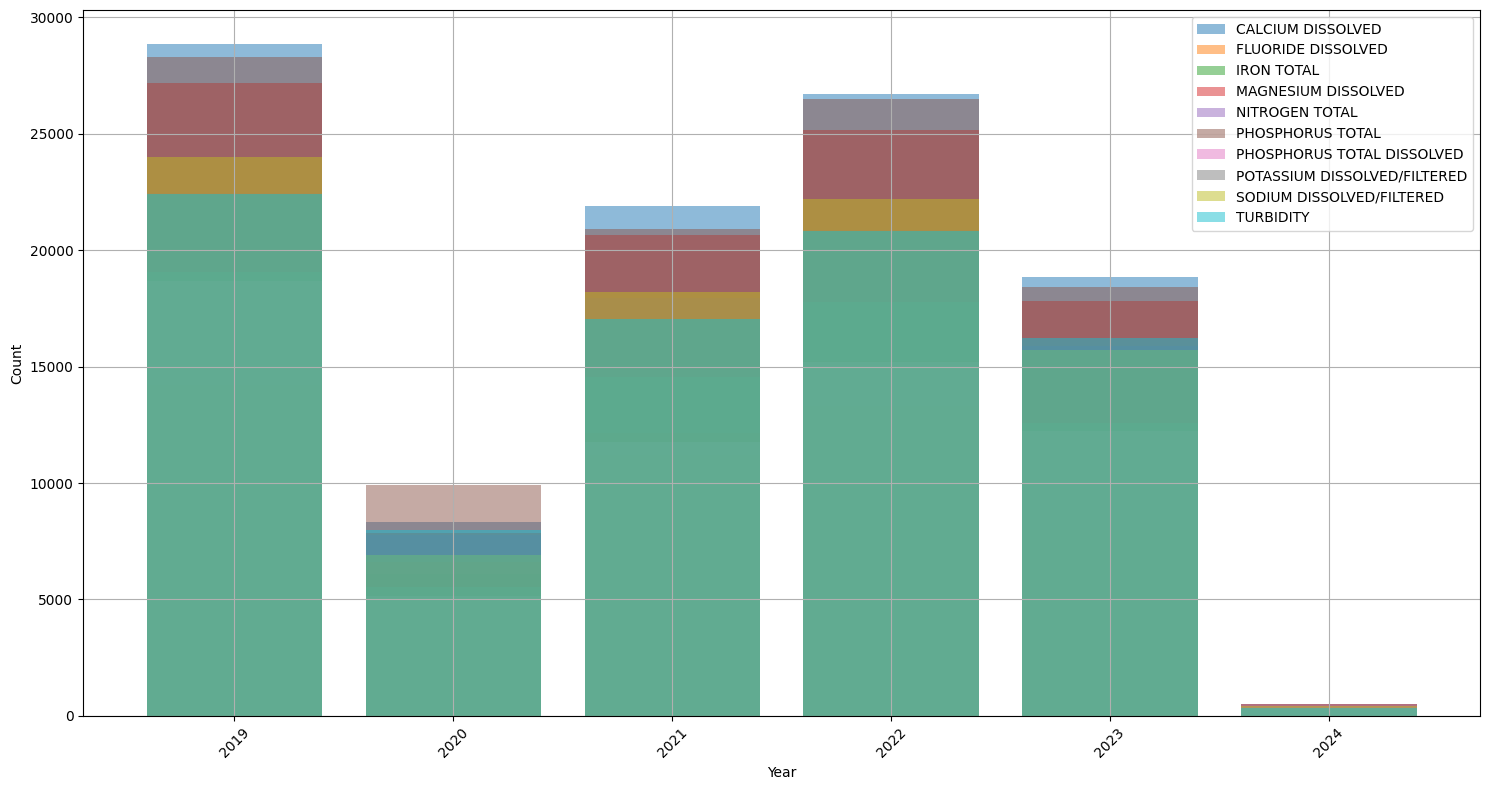

In [149]:
import matplotlib.pyplot as plt

# # Convert 'DATE_TIME_HEURE' column to datetime
df['DATE_TIME_HEURE'] = pd.to_datetime(df['DATE_TIME_HEURE'])

# Extract year from 'DATE_TIME_HEURE' column
df['Year'] = df['DATE_TIME_HEURE'].dt.year

# Filter data for the last 5 years
last_5_years_data = df[df['Year'] >= df['Year'].max() - 5]

# Calculate top 10 variables overall for the last 5 years
top_10_variables = last_5_years_data['VARIABLE'].value_counts().nlargest(10).index

# Filter the DataFrame to include data for these top 10 variables
filtered_data = last_5_years_data[last_5_years_data['VARIABLE'].isin(top_10_variables)]

# Group by variable and year, and count occurrences
variable_counts_by_year = filtered_data.groupby(['VARIABLE', 'Year']).size().unstack()

# Plot a bar chart for each variable, showing counts over the years
plt.figure(figsize=(15, 8))

for variable in variable_counts_by_year.index:
    plt.bar(variable_counts_by_year.columns, variable_counts_by_year.loc[variable], alpha=0.5, label=variable)

#plt.title('Counts of Top 10 VARIABLEs Over the Last 5 Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [150]:
print(df['Year'])

0           2000
1           2000
2           2000
3           2000
4           2000
            ... 
18761825    2023
18761826    2023
18761827    2023
18761828    2023
18761829    2023
Name: Year, Length: 18761830, dtype: int64


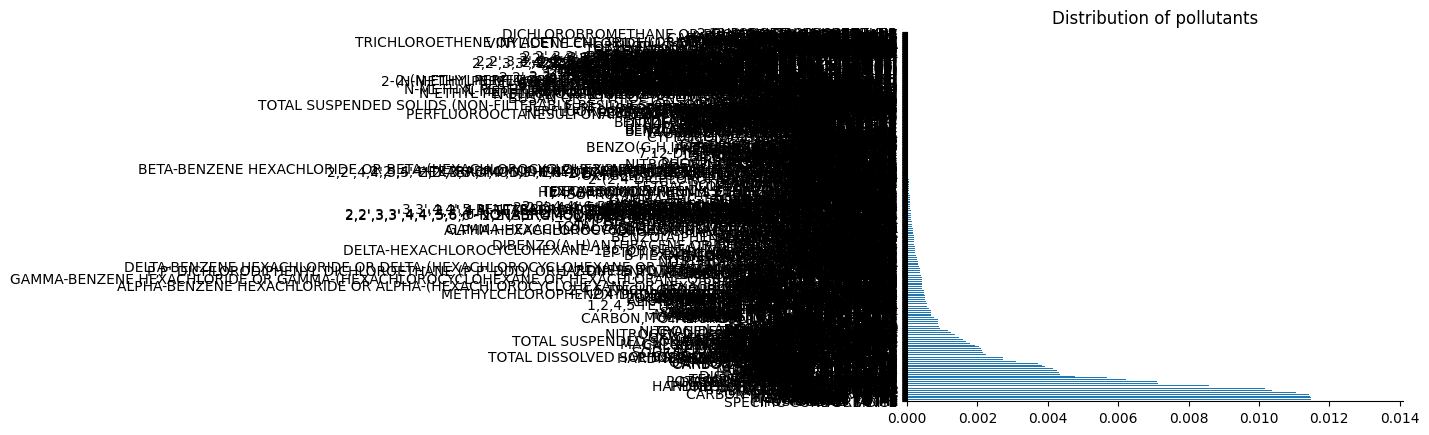

In [45]:
df["VARIABLE"].value_counts(normalize=True).plot(kind="barh")
plt.title("Distribution of pollutants")
sns.despine()
plt.show()

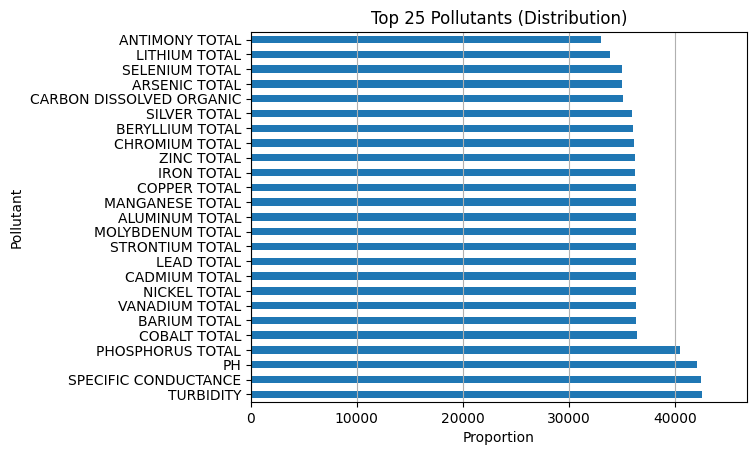

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the top 25 value counts
top_25_counts = df["VARIABLE"].value_counts().head(25)

# Create the bar chart
top_25_counts.plot(kind="barh")  # Horizontal bar chart

# Customize the plot
plt.title("Top 25 Pollutants (Distribution)")
plt.xlabel("Proportion")
plt.ylabel("Pollutant")
plt.grid(axis='x')  # Add gridlines on the x-axis

# Limit the x-axis range to improve readability (optional)
plt.xlim(0, top_25_counts.max() * 1.1)  # Adjust the multiplier as needed

plt.show()


In [47]:
# 2. Check for missing values (optional)
print(df['DATE_TIME_HEURE'].isnull().sum())  # This will print the number of missing values


0


In [48]:
df.groupby('VARIABLE').sum(numeric_only=True)

,SDL_LDE,MDL_LDM,VMV_CODE,Year
VARIABLE,,,,
"1,2,4,5-TETRABROMOBENZENE (1,2,4,5-TBB)",1771.000,0.000,164007613,3562278
"1,3,5-TRIBROMOBENZENE",232.000,0.000,3283740,468663
"1,3-DIBROMOBENZENE",217.000,0.000,1750973,438663
1-METHYLNAPHTHALENE,8121.600,0.000,38399752,754822
1-NAPHTHOL,19527.920,1568.995,3361280,1240976
...,...,...,...,...
ZINC SUSPENDED,0.000,0.483,26012662,1213377
ZINC TOTAL,4252.911,822.730,3746150356,72838832
ZINC TOTAL RECOVERABLE,308.620,308.620,17089556,4195486


In [151]:
df.groupby('SAMPLE_ID_ÉCHANTILLON').sum(numeric_only=True)

,SDL_LDE,MDL_LDM,VMV_CODE,VARIABLE_CODE,METHOD_CODE,LATITUDE,LONGITUDE,Year
SAMPLE_ID_ÉCHANTILLON,,,,,,,,
00PY000043,57.9289,0.0,25534164,225931.0,892219.0,16571.58906,-39750.17228,676000
00PY000047,31.6829,0.0,17523493,133023.0,571541.0,10903.95180,-25880.63568,444000
00PY000049,67.1183,0.0,19560234,156569.0,712023.0,12835.90170,-30058.59222,522000
00PY000069,59.0309,0.0,25711605,213712.0,846382.0,15861.78923,-39718.28042,634000
00PY000070,51.6697,0.0,16725079,154908.0,679712.0,12825.23033,-30190.57855,506000
...,...,...,...,...,...,...,...,...
24PY000136,69.5630,0.0,2535682,134850.0,481525.0,9171.76560,-21325.82200,331936
24PY000137,88.8390,0.0,1987101,173930.0,612685.0,11318.89896,-26229.48696,437184
24PY000138,78.4000,0.0,2408510,151387.0,523643.0,11276.94688,-23110.33616,380512


In [ ]:
# a TRue/False array, marking whether a row appears more than once
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
3166254    False
3166255    False
3166256    False
3166257    False
3166258    False
Length: 3166259, dtype: bool

In [ ]:
df.duplicated().sum()

302

In [ ]:
# the % of duplicates
df.duplicated().sum()/df.shape[0]*100

0.009538070006275545

<font color='blue'> We noticed a rather insignificant percentage of duplicates.</font>

In [22]:
df.loc[df.duplicated(), :].sort_values("DATE_TIME_HEURE")

,SITE_NO,DATE_TIME_HEURE,FLAG_MARQUEUR,VALUE_VALEUR,SDL_LDE,MDL_LDM,VMV_CODE,UNIT_UNITÉ,VARIABLE,STATUS_STATUT,SAMPLE_ID_ÉCHANTILLON,Year
133721,SA05JM0014,2001-06-05 13:00:00,NaN,0.781,NaN,NaN,7603,MG/L,NITROGEN TOTAL (CALCD.),P,2001PN140126,2001
133728,SA05JM0014,2001-06-05 13:00:00,NaN,0.081,NaN,NaN,15901,MG/L,PHOSPHORUS PARTICULATE (CALCD.),P,2001PN140126,2001
133687,SA05JM0014,2001-06-05 13:00:00,NaN,9.09,NaN,NaN,6002,MG/L,CARBON TOTAL ORGANIC (CALCD.),P,2001PN140126,2001
133672,SA05JM0014,2001-06-05 13:00:00,NaN,0.001,NaN,NaN,7570,MG/L,AMMONIA UN-IONIZED (CALCD.),P,2001PN140126,2001
2009,MA05OB0001,2002-09-10 14:00:00,NaN,0.002,NaN,NaN,7570,MG/L,AMMONIA UN-IONIZED (CALCD.),P,2002PN140158,2002
...,...,...,...,...,...,...,...,...,...,...,...,...
1739101,NF02ZM0098,2021-09-28 12:35:00,NaN,7.0,0.25,0.250,6010,MG/L,CARBON TOTAL ORGANIC,P,2021-AT0215-0726,2021
1739099,NF02ZM0098,2021-09-28 12:35:00,NaN,0.6,0.40,0.400,49184,MG/L,CALCIUM DISSOLVED,P,2021-AT0215-0726,2021
1739097,NF02ZM0098,2021-09-28 12:35:00,NaN,0.05,0.02,0.008,49193,MG/L,BROMINE DISSOLVED,P,2021-AT0215-0726,2021
1739114,NF02ZM0098,2021-09-28 12:35:00,NaN,0.4,0.40,0.400,49185,MG/L,MAGNESIUM DISSOLVED,P,2021-AT0215-0726,2021


In [ ]:
df["VALUE_VALEUR"].describe()

count     3166165.000
unique      71093.000
top             0.001
freq       100492.000
Name: VALUE_VALEUR, dtype: float64

In [ ]:
categorical_columns = df.select_dtypes('object').columns
categorical_columns

Index(['SITE_NO', 'FLAG_MARQUEUR', 'VALUE_VALEUR', 'UNIT_UNITÉ', 'VARIABLE',
       'STATUS_STATUT', 'SAMPLE_ID_ÉCHANTILLON'],
      dtype='object')

<ipython-input-49-cddb6c5c4c96>:10: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


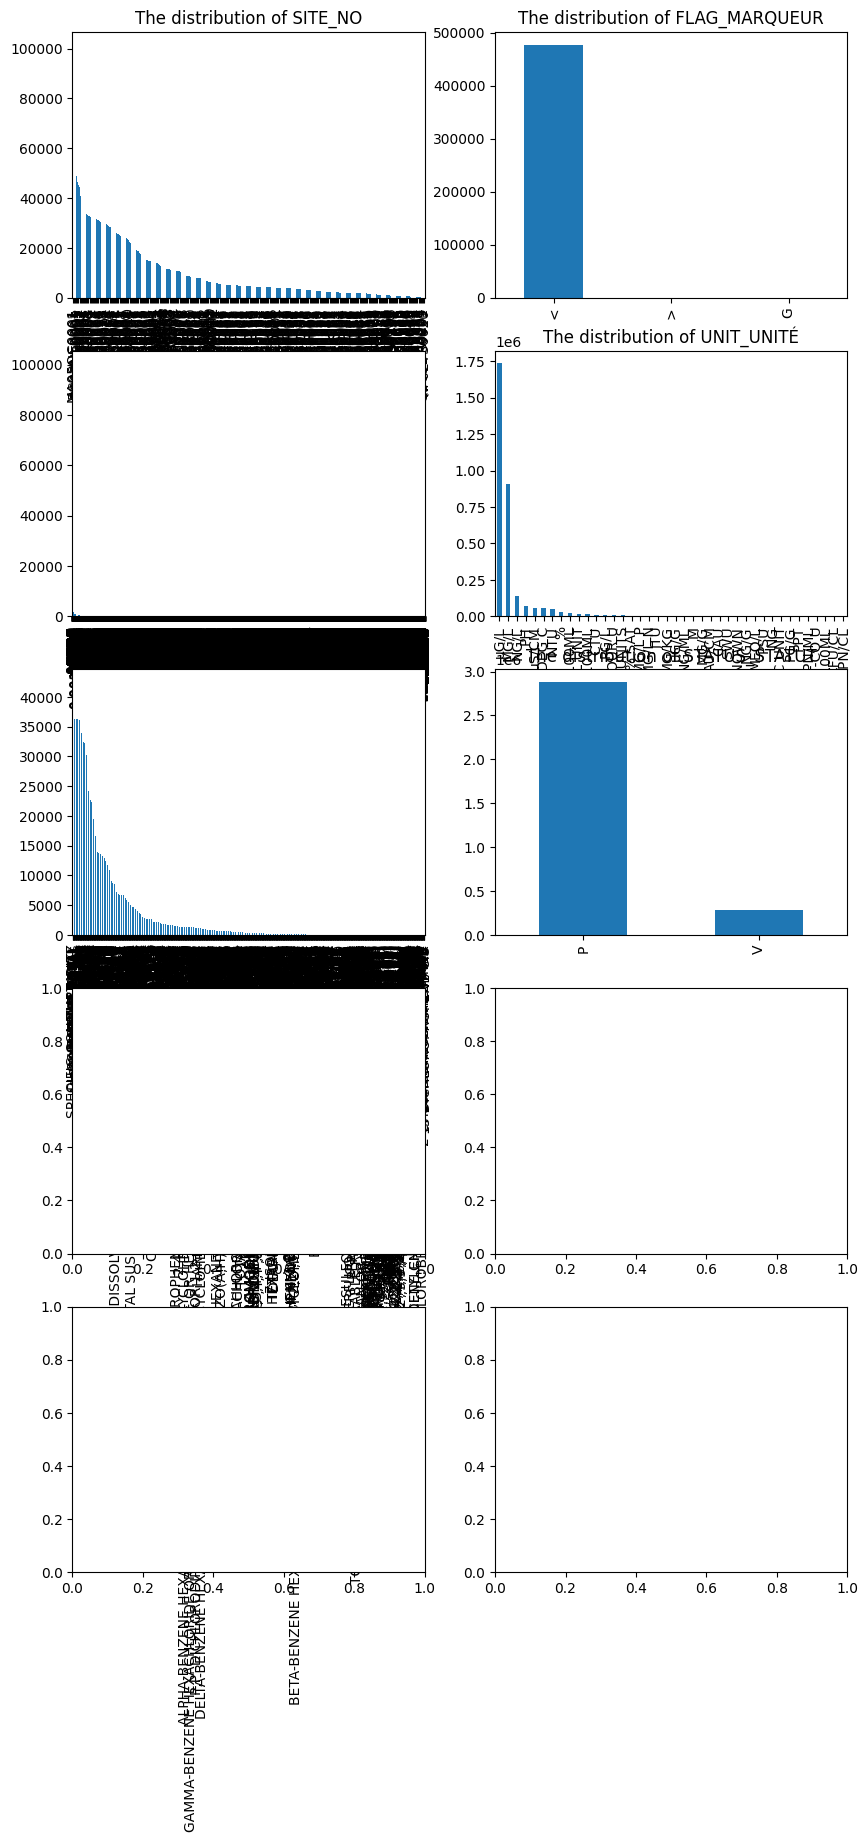

In [49]:
plt.subplots(5, 2, figsize = (10, 20))

for idx, col in enumerate(categorical_columns[:-1]):

    plt.subplot(5,2,idx+1)
    df[col].value_counts().plot(kind='bar')

    plt.title(f'The distribution of {col}')

plt.tight_layout()
plt.show()

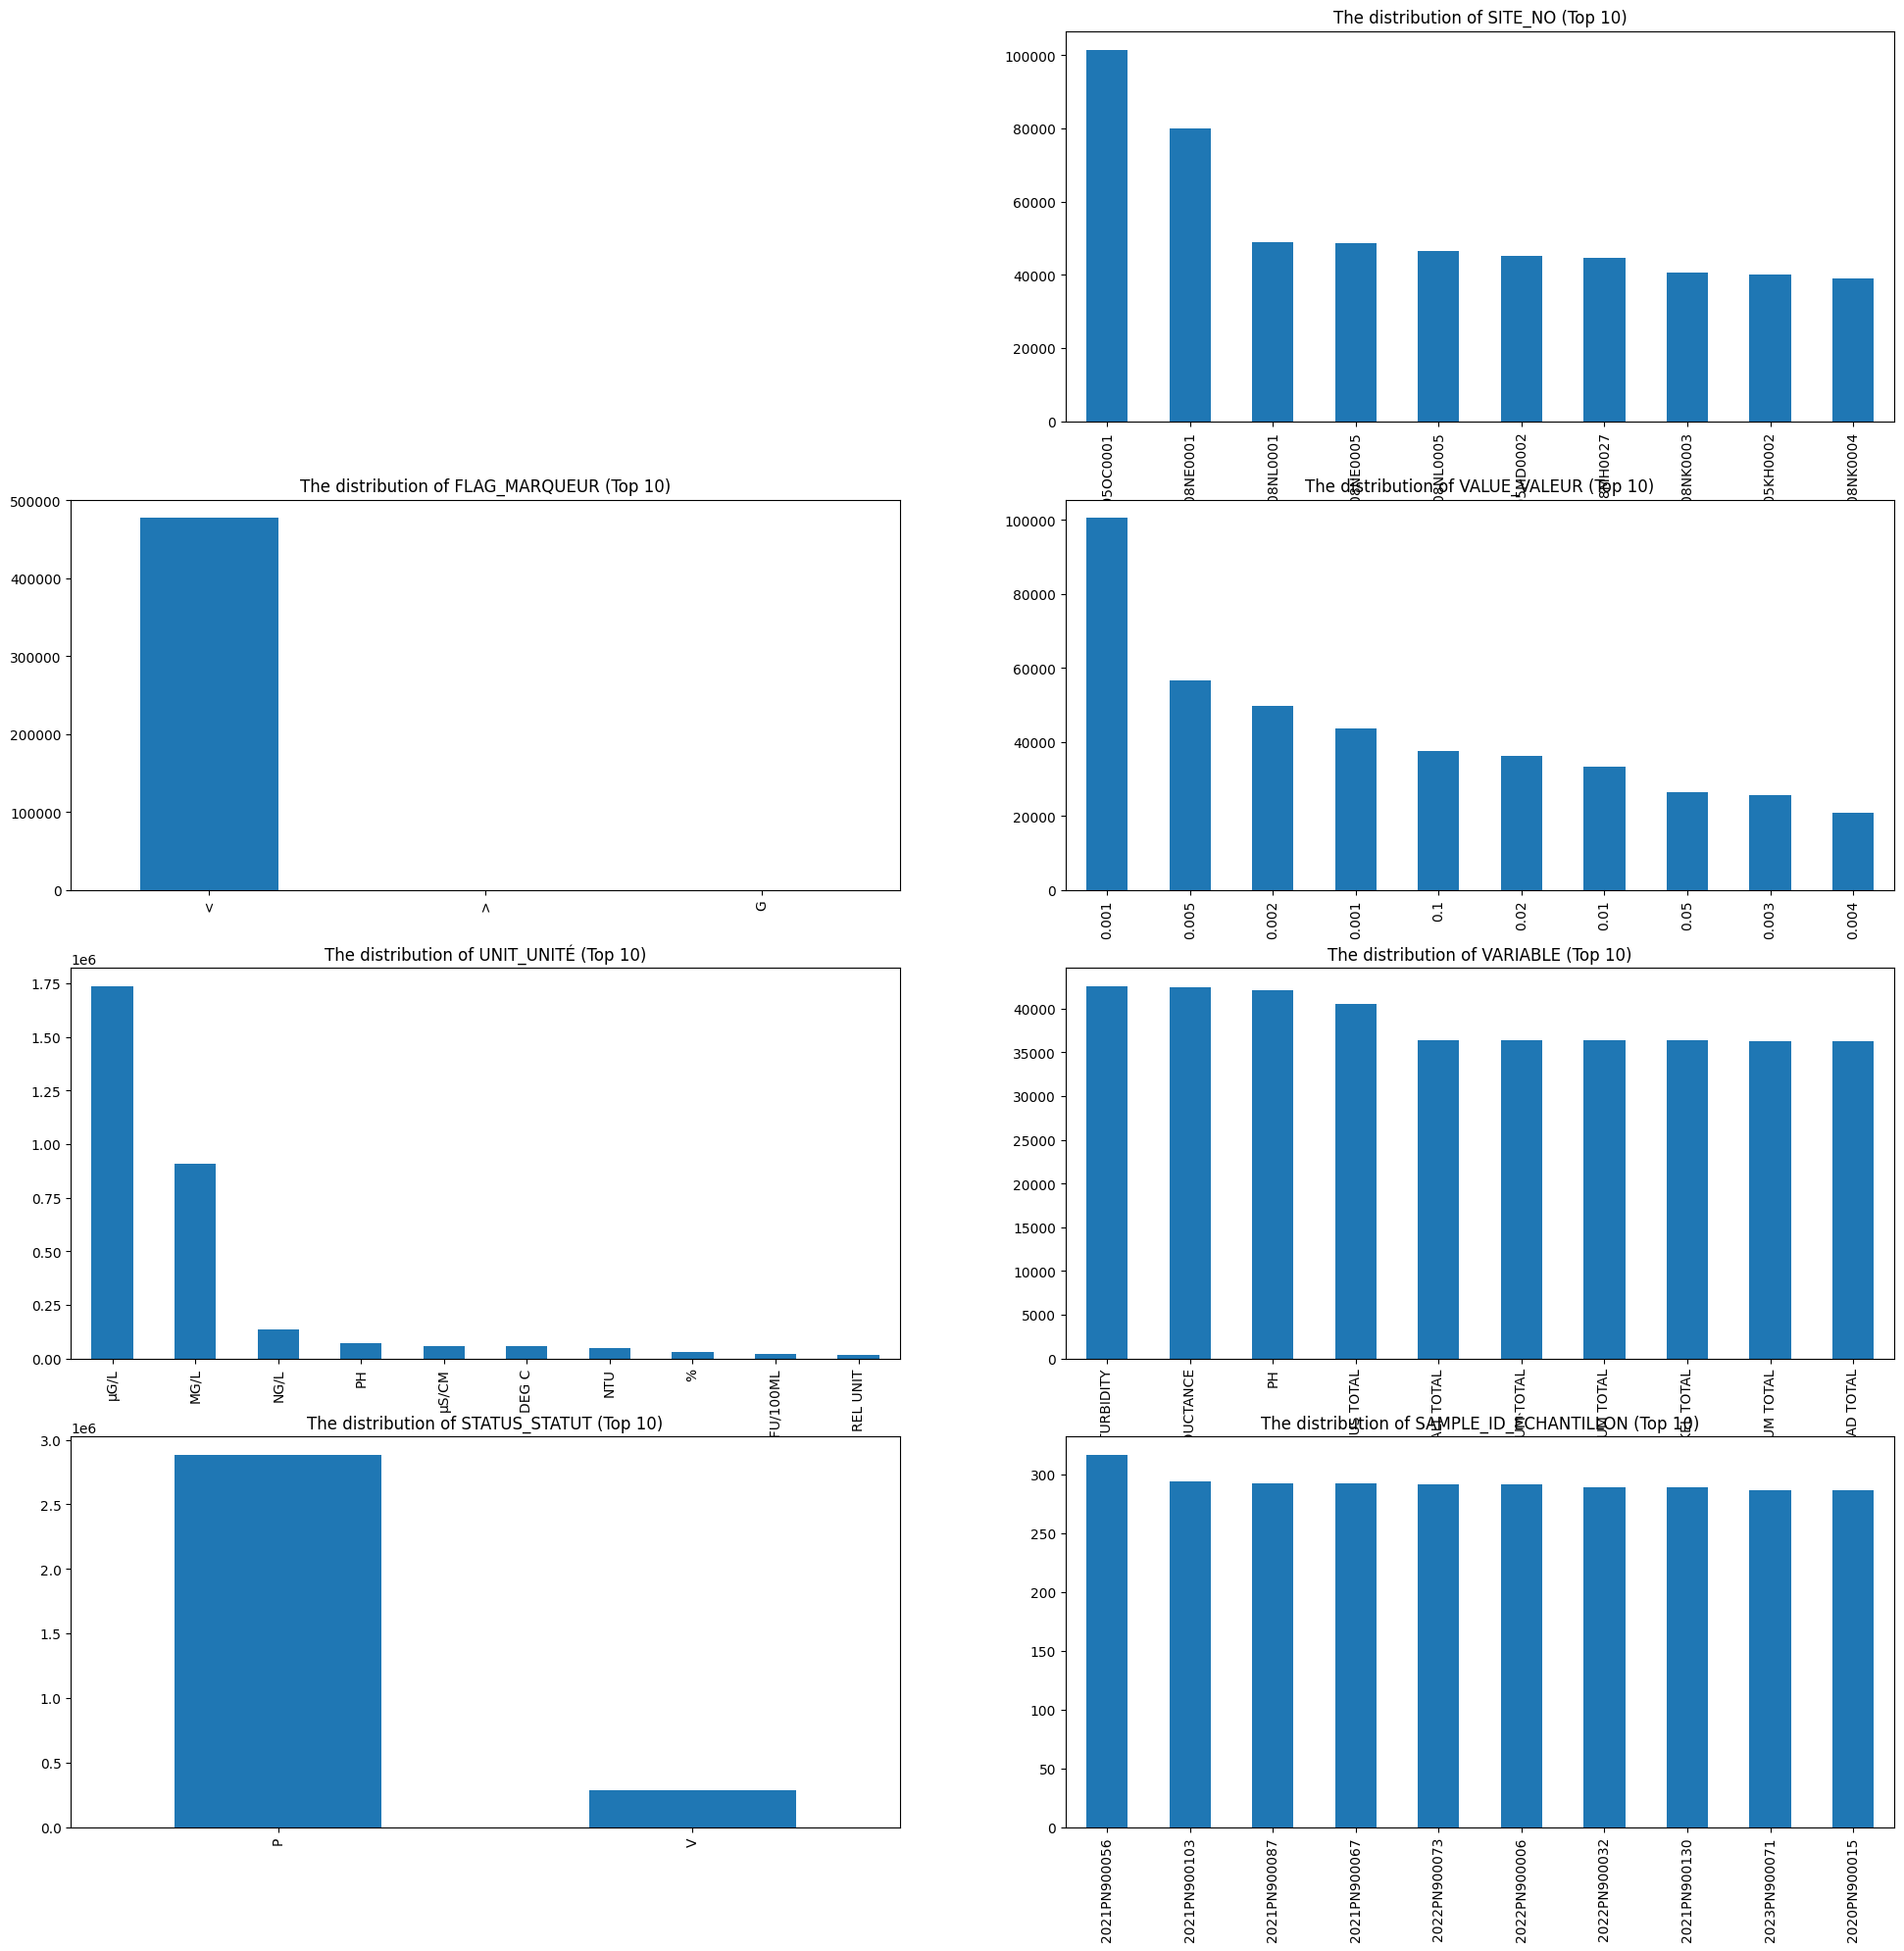

In [24]:
# import pandas as pd
# import plotly.express as px


# **Histogram code for top 10 categories:**

categorical_columns = df.select_dtypes(include=['object']).columns  # for categorical columns that are of object type

# Get top 10 categories for each column
top_10_categories = {}
for col in categorical_columns:
    top_10_categories[col] = df[col].value_counts().nlargest(10)

# Create subplots to visualize top 10 categories
plt.figure(figsize=(24, 30))  # Adjust figure size as needed

for idx, col in enumerate(top_10_categories):
    plt.subplot(5, 2, idx+2)
    top_10_categories[col].plot(kind='bar')
    plt.title(f'The distribution of {col} (Top 10)')

<font color='blue'> Looking at plots above, is clear that the dataset is rather large and contains multiple variables. Nevertheless, I am not ready to drop any columns.</font>

In [52]:
# Filter data for the last 5 years
last_5_years_data = df[df['Year'] >= df['Year'].max() - 5]
last_5_years_data

,SITE_NO,DATE_TIME_HEURE,FLAG_MARQUEUR,VALUE_VALEUR,SDL_LDE,MDL_LDM,VMV_CODE,UNIT_UNITÉ,VARIABLE,STATUS_STATUT,SAMPLE_ID_ÉCHANTILLON,Year
23756,MA05OB0001,2019-01-14 10:50:00,NaN,309,0.100,NaN,10111,MG/L,ALKALINITY TOTAL CACO3,P,2018PN900167,2019
23757,MA05OB0001,2019-01-14 10:50:00,NaN,2.4,0.500,NaN,107941,µG/L,ALUMINUM DISSOLVED,P,2018PN900167,2019
23758,MA05OB0001,2019-01-14 10:50:00,NaN,47.7,0.500,NaN,107905,µG/L,ALUMINUM TOTAL,P,2018PN900167,2019
23759,MA05OB0001,2019-01-14 10:50:00,NaN,0.114,0.005,NaN,7540,MG/L,AMMONIA DISSOLVED,P,2018PN900167,2019
23760,MA05OB0001,2019-01-14 10:50:00,NaN,0.001,NaN,NaN,7570,MG/L,AMMONIA UN-IONIZED (CALCD.),P,2018PN900167,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
3166254,BC08MH0453,2023-11-20 08:40:00,NaN,9.7,0.300,NaN,1972,MG/L,SULPHATE,P,24PY000026,2023
3166255,BC08MH0453,2023-11-20 08:40:00,NaN,8.9,-50.000,NaN,97060,DEG C,TEMPERATURE (AIR),P,24PY000026,2023
3166256,BC08MH0453,2023-11-20 08:40:00,NaN,6.77,0.100,NaN,2055,DEG C,TEMPERATURE WATER (FIELD),P,24PY000026,2023
3166257,BC08MH0453,2023-11-20 08:40:00,NaN,0.118,0.003,NaN,1971,MG/L,TOTAL NITRATE,P,24PY000026,2023


### Section 1.2 - <a id="s1_2"></a> Preliminary visualization and trend analysis

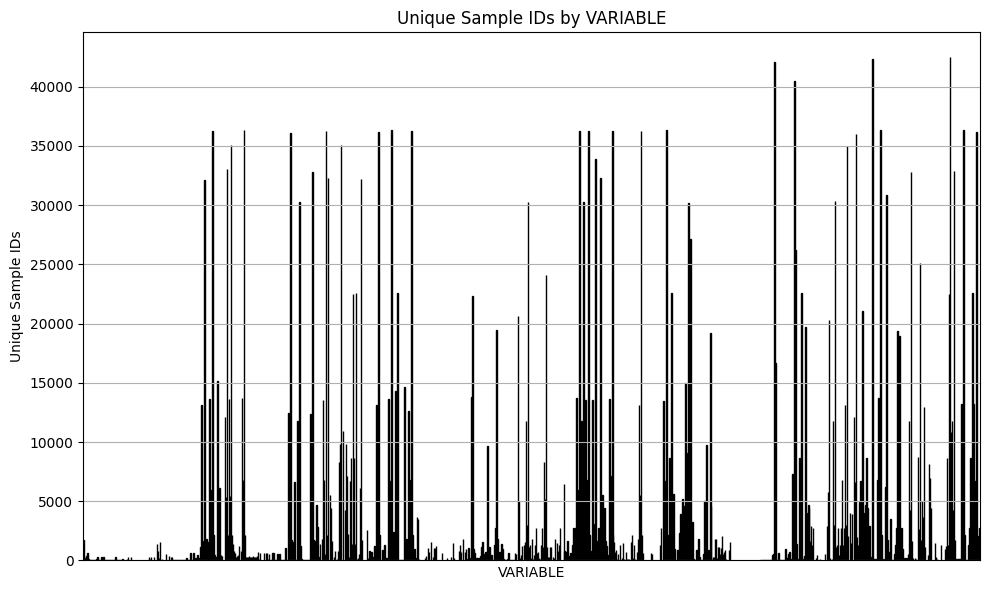

In [53]:


# Group by VARIABLE and count unique SAMPLE_ID_ÉCHANTILLON values
grouped_counts = df.groupby('VARIABLE')['SAMPLE_ID_ÉCHANTILLON'].nunique()

# Create a bar plot
plt.figure(figsize=(10, 6))
grouped_counts.plot(kind='bar', color='green', edgecolor='black')
#grouped_counts.plot(kind='bar', cmap='viridis', edgecolor='black')

# Remove x-axis ticks and labels
plt.xticks([])  # Hide x-axis ticks
plt.xlabel('')  # Hide x-axis label

plt.xlabel('VARIABLE')
plt.xticks(rotation=45)
plt.ylabel('Unique Sample IDs')
plt.title('Unique Sample IDs by VARIABLE')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


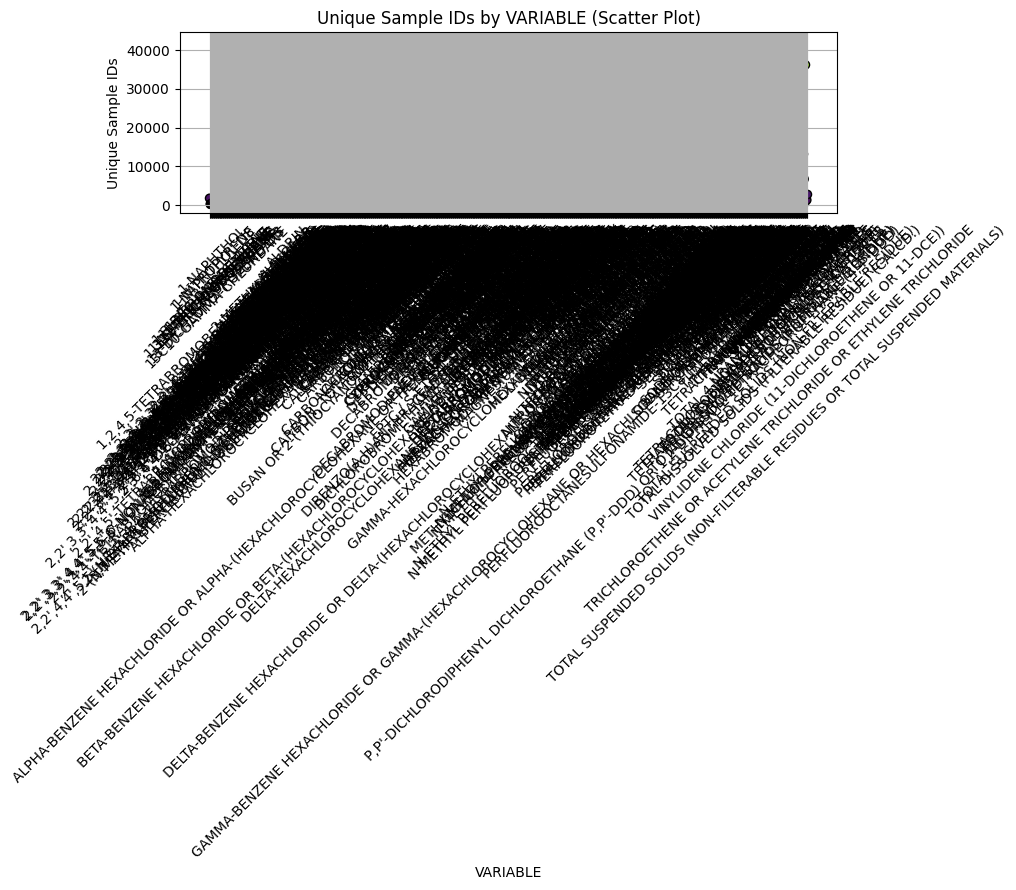

In [54]:
# Group by VARIABLE and count unique SAMPLE_ID_ÉCHANTILLON values
grouped_counts = df.groupby('VARIABLE')['SAMPLE_ID_ÉCHANTILLON'].nunique()

# Create a scatter plot
plt.figure(figsize=(10, 9))
plt.scatter(grouped_counts.index, grouped_counts.values, c=grouped_counts.values, cmap='viridis', edgecolor='black')

# Remove x-axis ticks and labels
#plt.xticks([])  # Hide x-axis ticks
#plt.xlabel('')  # Hide x-axis label

plt.xlabel('VARIABLE')
plt.xticks(rotation=45)
plt.ylabel('Unique Sample IDs')
plt.title('Unique Sample IDs by VARIABLE (Scatter Plot)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#display all column names of DataFrame
print(df.columns.tolist())

<font color='blue'> Attempting to visualize trends.</font>

<ipython-input-84-3cae78aef68b>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


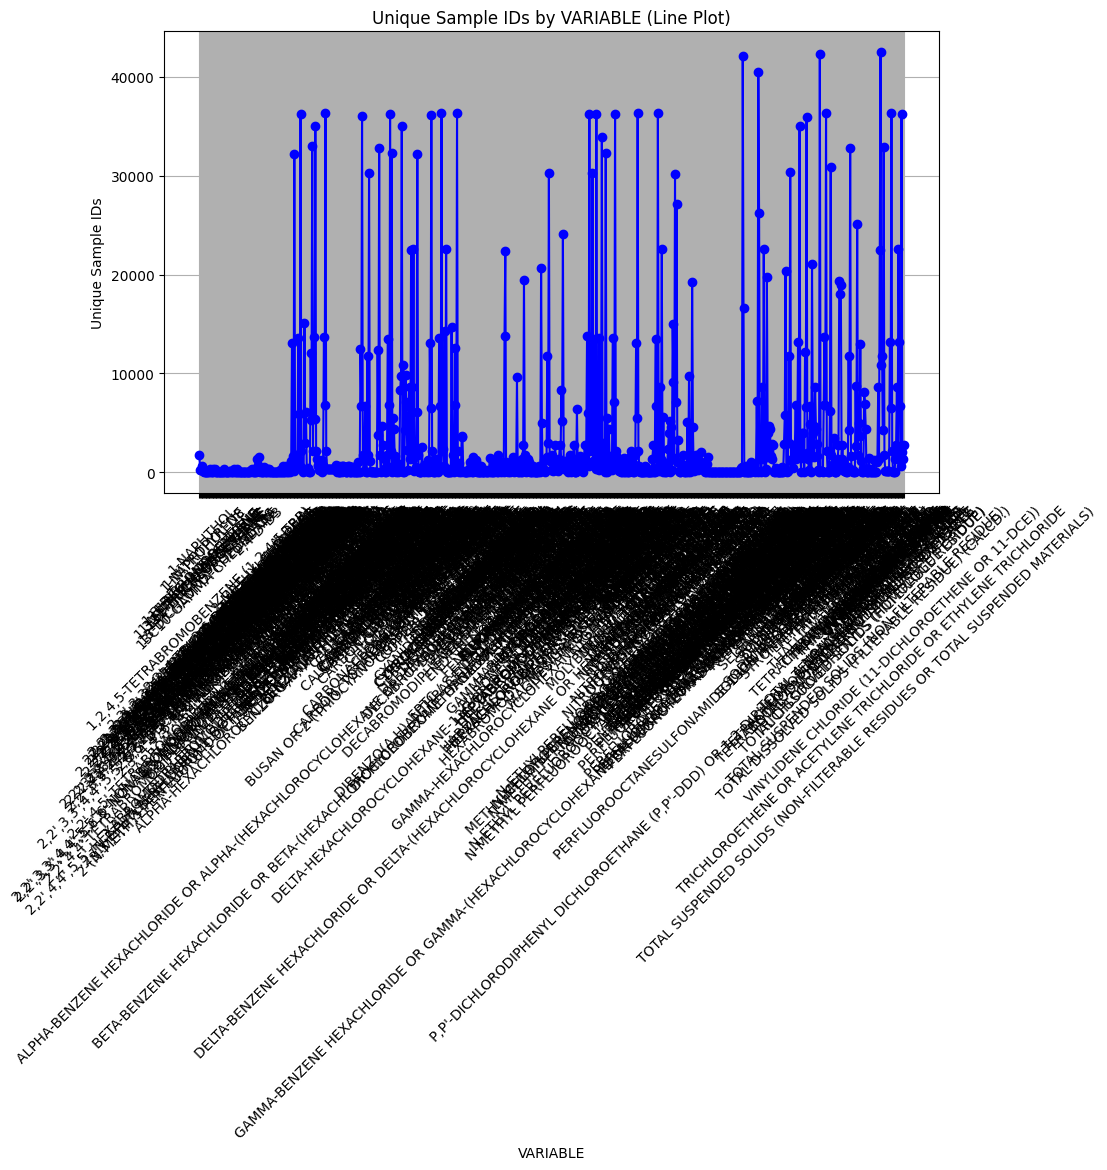

In [84]:


# Group by VARIABLE and count unique SAMPLE_ID_ÉCHANTILLON values
grouped_counts = df.groupby('VARIABLE')['SAMPLE_ID_ÉCHANTILLON'].nunique()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(grouped_counts.index, grouped_counts.values, marker='o', color='blue', linestyle='-', label='Unique Sample IDs')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.xlabel('VARIABLE')
plt.ylabel('Unique Sample IDs')
plt.title('Unique Sample IDs by VARIABLE (Line Plot)')
plt.grid(True)
plt.tight_layout()
plt.show()



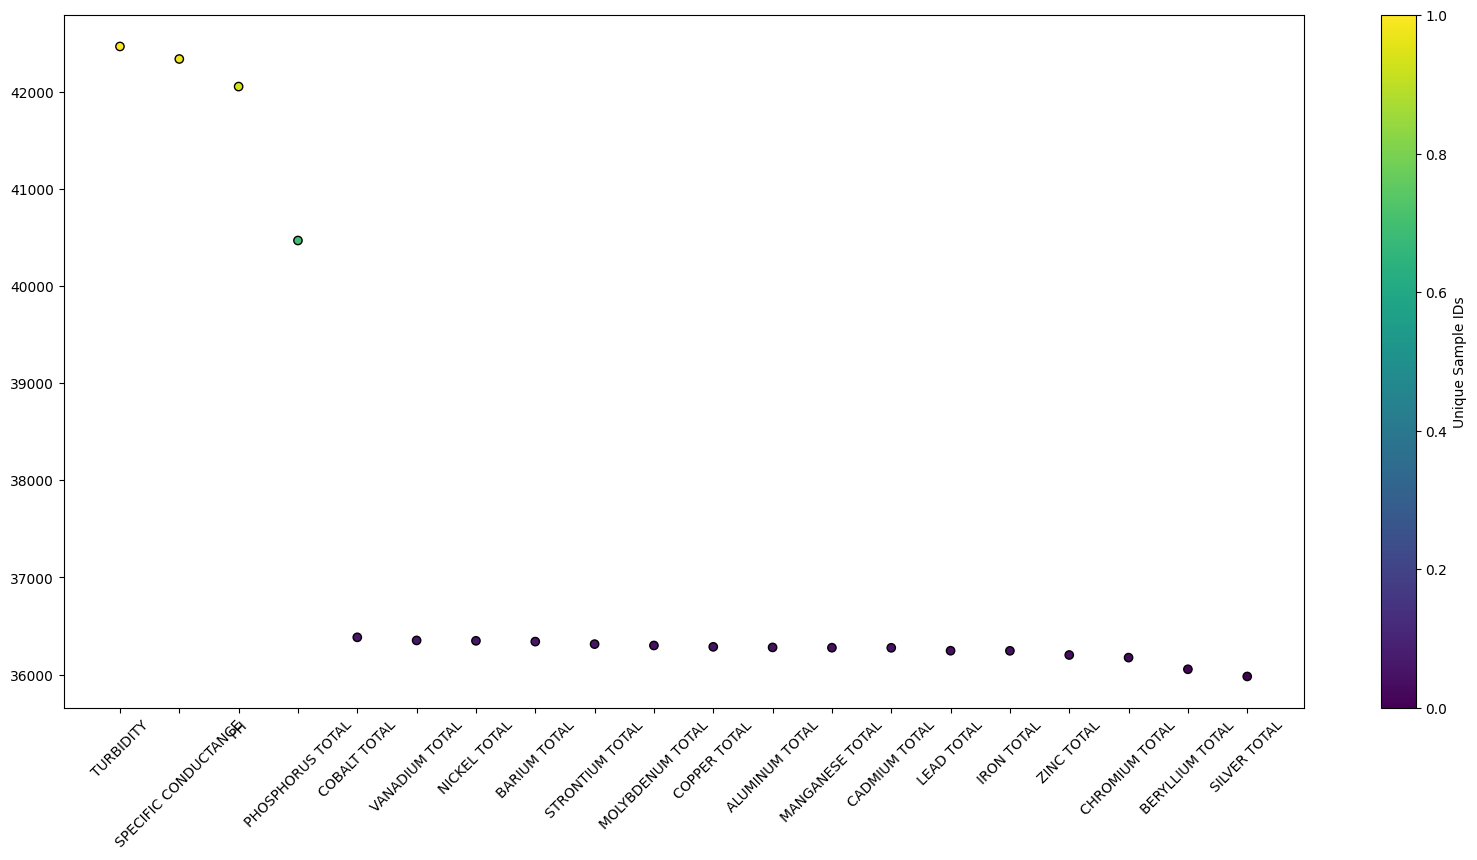

In [56]:
# Filter top 20 variables
top_20_counts = grouped_counts.sort_values(ascending=False).head(20)

# Create colormap based on counts
cmap = plt.cm.viridis
norm = plt.Normalize(top_20_counts.min(), top_20_counts.max())

# Create scatter plot
plt.figure(figsize=(20, 9))
plt.scatter(top_20_counts.index, top_20_counts.values, c=cmap(norm(top_20_counts.values)), edgecolor='black')

# Rotate x-axis ticks for better readability
plt.xticks(rotation=45)  # Adjust the angle as needed (e.g., 90 for vertical)


plt.colorbar(label='Unique Sample IDs')  # Add colorbar to show count legend
plt.show()


# Part 2 - Exploratory Data Analysis <a id="p2"></a>

Map

In [153]:
!pip install dash plotly

In [154]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd  # Import pandas for data manipulation

# Load your data (replace with the actual path to your data file)
#data = pd.read_csv("your_data_file.csv")  # Assuming CSV format
data = df

# Create Dash app
app = dash.Dash(__name__)

# Define app layout
app.layout = html.Div([
    html.H1("Water Monitoring Sites - Canadian River Basins", style={'textAlign': 'center'}),  # Title
    dcc.Graph(
        id='map-plot',
        figure=px.scatter_mapbox(data, lat="LATITUDE", lon="LONGITUDE", hover_name="SITE_NAME",
                                 color_discrete_sequence=["fuchsia"], zoom=10, height=600,
                                 mapbox_style="open-street-map", center=dict(lat=data['LATITUDE'].mean(), lon=data['LONGITUDE'].mean()))
    )
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

# Part 3 - Preprocessing <a id="p3"></a>

In [155]:
# Checking correlation between numeric variables
df.corr(numeric_only = True)

,SDL_LDE,MDL_LDM,VMV_CODE,VARIABLE_CODE,METHOD_CODE,LATITUDE,LONGITUDE,Year
SDL_LDE,1.000000,0.995740,-0.051229,-0.025738,-0.011703,-0.016885,0.058606,-0.047713
MDL_LDM,0.995740,1.000000,0.020607,0.008838,-0.028931,-0.011326,-0.015409,0.001516
VMV_CODE,-0.051229,0.020607,1.000000,0.026188,-0.035420,0.092011,-0.010017,0.039110
VARIABLE_CODE,-0.025738,0.008838,0.026188,1.000000,0.055265,0.003883,-0.013340,0.070744
METHOD_CODE,-0.011703,-0.028931,-0.035420,0.055265,1.000000,-0.001270,-0.010652,-0.003889
LATITUDE,-0.016885,-0.011326,0.092011,0.003883,-0.001270,1.000000,-0.469806,0.023944
LONGITUDE,0.058606,-0.015409,-0.010017,-0.013340,-0.010652,-0.469806,1.000000,-0.001461
Year,-0.047713,0.001516,0.039110,0.070744,-0.003889,0.023944,-0.001461,1.000000


Covariance

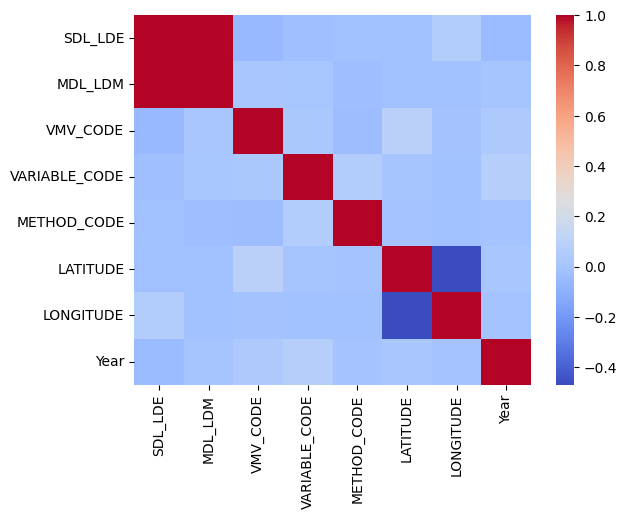

In [156]:
# Plotting

import seaborn as sns
sns.heatmap(df.corr(numeric_only = True), cmap='coolwarm')
plt.show()

<font color='blue'> There seems to be a correlation between the Latitude and the VMV_CODE.</font>

Checking if the correlations are statistically significant.

In [36]:
# We will use Pearson correlation tests and we will focus on positively correlated columns.


# Calculating the correlation coefficients and p-values
corr1, pval = stats.pearsonr(df['VARIABLE_CODE'], df['METHOD_CODE'])
corr2, pval = stats.pearsonr(df['VARIABLE_CODE'], df['Year'])

# Format p-value manually with 6 decimal places
formatted_pval = f"{pval:.8f}"

# Printing the results
print("-" * 30)
print(f"VMV_CODE vs. Latitude")
print(f"    - correlation coefficient: {corr1:.4f}")
print(f"    - p-value: {formatted_pval}")
print("-" * 30)

print("-" * 30)
print(f"VMV_CODE vs. Variable Code")
print(f"    - correlation coefficient: {corr2:.4f}")
print(f"    - p-value: {formatted_pval}")
print("-" * 30)


# Interpretation
# A correlation coefficient close to 1 indicates a strong positive relationship.
# A correlation coefficient close to -1 indicates a strong negative relationship.
# A p-value close to 0 indicates a statistically significant correlation.


KeyError: 'VARIABLE_CODE'

Our goal is to model the volume of one specific chemical over time. So, the dependent variable is VMV_CODE and the independent variable is LATITUDE. We will split the data up accordingly.

In [18]:
X = df['LATITUDE'] # independent, often referenced as "X" by convention
y = df['VMV_CODE'] # dependent, often referenced as "y" by convention

In [165]:
np.var(X)

30.395953712322278

In [166]:
np.cov(X, y)

array([[3.03959553e+01, 2.40140760e+04],
       [2.40140760e+04, 2.24098648e+09]])

In [167]:
df.cov()

<ipython-input-167-6f98a29763d5>:1: FutureWarning:

The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,SDL_LDE,MDL_LDM,VMV_CODE,VARIABLE_CODE,METHOD_CODE,LATITUDE,LONGITUDE,Year
SDL_LDE,69.859247,280.433466,-2.000221e+04,-145.839487,-2.016242e+02,-0.776819,10.226712,-2.524419
MDL_LDM,280.433466,451.555100,2.043688e+04,113.024238,-1.245923e+03,-0.665250,-2.271293,0.097740
VMV_CODE,-20002.206968,20436.878176,2.240986e+09,821327.207004,-3.572261e+06,24014.076006,-12144.736539,11649.778272
VARIABLE_CODE,-145.839487,113.024238,8.213272e+05,438948.679416,7.804867e+04,14.182125,-226.334930,294.914767
METHOD_CODE,-201.624184,-1245.922619,-3.572261e+06,78048.673405,4.541442e+06,-14.922480,-581.464157,-52.153058
LATITUDE,-0.776819,-0.665250,2.401408e+04,14.182125,-1.492248e+01,30.395955,-66.337139,0.830651
LONGITUDE,10.226712,-2.271293,-1.214474e+04,-226.334930,-5.814642e+02,-66.337139,655.933541,-0.235408
Year,-2.524419,0.097740,1.164978e+04,294.914767,-5.215306e+01,0.830651,-0.235408,39.592351


In [20]:
print(np.corrcoef(X,y))

[[1.         0.09201071]
 [0.09201071 1.        ]]


In [21]:
df.corr()

<ipython-input-21-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SDL_LDE,MDL_LDM,VMV_CODE,VARIABLE_CODE,METHOD_CODE,LATITUDE,LONGITUDE
SDL_LDE,1.000000,0.995740,-0.051229,-0.025738,-0.011703,-0.016885,0.058606
MDL_LDM,0.995740,1.000000,0.020607,0.008838,-0.028931,-0.011326,-0.015409
VMV_CODE,-0.051229,0.020607,1.000000,0.026188,-0.035420,0.092011,-0.010017
VARIABLE_CODE,-0.025738,0.008838,0.026188,1.000000,0.055265,0.003883,-0.013340
METHOD_CODE,-0.011703,-0.028931,-0.035420,0.055265,1.000000,-0.001270,-0.010652
LATITUDE,-0.016885,-0.011326,0.092011,0.003883,-0.001270,1.000000,-0.469806
LONGITUDE,0.058606,-0.015409,-0.010017,-0.013340,-0.010652,-0.469806,1.000000


### Section 3.1 - <a id="q3_1"></a>  Basic Statistics

Null Hypothesis (H0): there is no significant association between VARIABLE (CARBON TOTAL ORGANIC?) occurrence and the SITE
Alternative Hypothesis (H1): there is a significant association between VARIABLE (CARBON TOTAL ORGANIC?) occurrence and the SITE

Being categorical data types, we determine that Chi Squared is the suitable hypothesis test

In [22]:
# Correlation between numeric values

df.corr(numeric_only = True)


,SDL_LDE,MDL_LDM,VMV_CODE,VARIABLE_CODE,METHOD_CODE,LATITUDE,LONGITUDE
SDL_LDE,1.000000,0.995740,-0.051229,-0.025738,-0.011703,-0.016885,0.058606
MDL_LDM,0.995740,1.000000,0.020607,0.008838,-0.028931,-0.011326,-0.015409
VMV_CODE,-0.051229,0.020607,1.000000,0.026188,-0.035420,0.092011,-0.010017
VARIABLE_CODE,-0.025738,0.008838,0.026188,1.000000,0.055265,0.003883,-0.013340
METHOD_CODE,-0.011703,-0.028931,-0.035420,0.055265,1.000000,-0.001270,-0.010652
LATITUDE,-0.016885,-0.011326,0.092011,0.003883,-0.001270,1.000000,-0.469806
LONGITUDE,0.058606,-0.015409,-0.010017,-0.013340,-0.010652,-0.469806,1.000000


In [170]:
# A convenience function from scipy.stats
tval,p = stats.pearsonr(X,y)
print("T={} p={}".format(tval,p))

T=0.09201070611679044 p=0.0


In [171]:
# A convenience function from scipy.stats
tval,p = stats.pearsonr(X,y)
print("T={:4.3f} p={:4.3f}".format(tval,p))

T=0.092 p=0.000


Scatter Plot

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Latitude and VMV_Code are already defined (replace with your actual data)

data  = pd.DataFrame({'LATITUDE', 'MVM_CODE'})

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LATITUDE', y='VMV_CODE', data=data)

# Adjust subplot layout (optional)
plt.subplots_adjust(left=0.2)  # Adjust left margin (example)

plt.show()


ValueError: Could not interpret value `LATITUDE` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

In [27]:
plt.scatter(LATITUDE, MVM_CODE)

NameError: name 'LATITUDE' is not defined

In [35]:
# We now perform further analysis to determine if the correlations are statistically significant.
# We will use Pearson correlation tests and we will focus on positively correlated columns.


# Calculating the correlation coefficients and p-values
corr1, pval = stats.pearsonr(df['VMV_CODE'], df['LATITUDE'])
corr2, pval = stats.pearsonr(df['METHOD_CODE'], d1['VARIABLE_CODE'])

# Format p-value manually with 6 decimal places
formatted_pval = f"{pval:.8f}"

# Printing the results
print("-" * 30)
print(f"Numeric Valid Method vs. Sample Detection Limit")
print(f"    - correlation coefficient: {corr1:.4f}")
print(f"    - p-value: {formatted_pval}")
print("-" * 30)

print("-" * 30)
print(f"Numeric Valid Method vs. Method Detection Limit")
print(f"    - correlation coefficient: {corr2:.4f}")
print(f"    - p-value: {formatted_pval}")
print("-" * 30)


# Interpretation
# A correlation coefficient close to 1 indicates a strong positive relationship.
# A correlation coefficient close to -1 indicates a strong negative relationship.
# A p-value close to 0 indicates a statistically significant correlation.

KeyError: 'LATITUDE'

In [33]:
# Sample data with missing values and mixed data types
data = {'VMV_CODE': [1, 2, 3, None, 5, 'inf'],
        'SDL_LDE': [10, 12, None, None, 18, 'abc'],
        'MDL_LDM': [8, 11, 13, None, 16, np.inf]}
df = pd.DataFrame(data)

# Handle missing values (e.g., replace with mean or median)
df['VMV_CODE'].fillna(df['VMV_CODE'].mean(), inplace=True)  # Replace NaN with mean
df['SDL_LDE'].fillna(df['SDL_LDE'].median(), inplace=True)  # Replace NaN with median
df['MDL_LDM'] = pd.to_numeric(df['MDL_LDM'], erxrors='coerce')  # Convert to numeric, handle non-numeric

# Calculate correlation coefficients and p-values
corr1, pval1 = stats.pearsonr(df['VMV_CODE'], df['SDL_LDE'])
corr2, pval2 = stats.pearsonr(df['VMV_CODE'], df['MDL_LDM'])

# Format p-values manually with 6 decimal places
formatted_pval1 = f"{pval1:.6f}"
formatted_pval2 = f"{pval2:.6f}"

# Printing the results
print("-" * 30)
print(f"Numeric Valid Method vs. Sample Detection Limit")
print(f"  - correlation coefficient: {corr1:.4f}")
print(f"  - p-value: {formatted_pval1}")
print("-" * 30)

print("-" * 30)
print(f"Numeric Valid Method vs. Method Detection Limit")
print(f"  - correlation coefficient: {corr2:.4f}")
print(f"  - p-value: {formatted_pval2}")
print("-" * 30)


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [32]:

# Sample data with missing values and mixed data types
data = {'VMV_CODE': [1, 2, 3, None, 5, 'inf'],
        'SDL_LDE': [10, 12, None, None, 18, 'abc'],
        'MDL_LDM': [8, 11, 13, None, 16, np.inf]}
df = pd.DataFrame(data)

# Handle missing values (e.g., replace with mean or median)
df['VMV_CODE'].fillna(df['VMV_CODE'].mean(), inplace=True)  # Replace NaN with mean
df['SDL_LDE'].fillna(df['SDL_LDE'].median(), inplace=True)  # Replace NaN with median
df['MDL_LDM'] = pd.to_numeric(df['MDL_LDM'], erxrors='coerce')  # Convert to numeric, handle non-numeric

# Calculate correlation coefficients and p-values
corr1, pval1 = stats.pearsonr(df['VMV_CODE'], df['SDL_LDE'])
corr2, pval2 = stats.pearsonr(df['VMV_CODE'], df['MDL_LDM'])

# Format p-values manually with 6 decimal places
formatted_pval1 = f"{pval1:.6f}"
formatted_pval2 = f"{pval2:.6f}"

# Printing the results
print("-" * 30)
print(f"Numeric Valid Method vs. Sample Detection Limit")
print(f"  - correlation coefficient: {corr1:.4f}")
print(f"  - p-value: {formatted_pval1}")
print("-" * 30)

print("-" * 30)
print(f"Numeric Valid Method vs. Method Detection Limit")
print(f"  - correlation coefficient: {corr2:.4f}")
print(f"  - p-value: {formatted_pval2}")
print("-" * 30)


TypeError: unsupported operand type(s) for +: 'int' and 'str'

Hypothesis testing

In [37]:
np.mean(X)

51.64861221133379

In [38]:
np.mean(y)

73594.25887122951

alpha: 5%

H0: There is no association between the Latitude and the MVM Code

H1: There is association between the two

In [31]:
# Grouping data by VARIABLE and SITE NUMBER
grouped_data = df.groupby(['VARIABLE', 'SITE_NO']).size().unstack()

# Performing Chi-square test
chi2, pval, _, _ = stats.chi2_contingency(grouped_data)

# Printing the p-value
print("p-value:", pval)

# Interpreting results
if pval < 0.05:
    print("Reject the null hypothesis. There is a statistically significant difference in VARIABLE volume among different SITE NUMBERs.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in VARIABLE volume among different SITE NUMBERs.")


p-value: nan
Fail to reject the null hypothesis. There is no statistically significant difference in VARIABLE volume among different SITE NUMBERs.


<font color='blue'> Revising the hypothesis.</font>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Defining the range for the x-axis (degrees of freedom = 4)
#x = np.arange(0, 20, 0.001)
x = np.linspace(0, 20, 1000)

# Calculating the Chi-square probability density function (PDF)
pdf_values = chi2.pdf(x, df=4)

# Plotting the Chi-square distribution
plt.plot(x, pdf_values, label='Chi-Square (df=4)', color='blue')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Chi-Square Distribution (df=4)')
plt.legend()

# Shade the area corresponding to p-value at the tail
alpha = 0.05  # significance level (adjust as needed)
critical_value = chi2.ppf(1 - alpha, df=4)  # Find the critical value for the given significance level
x_shade = np.linspace(critical_value, x.max(), 100)
plt.fill_between(x_shade, chi2.pdf(x_shade, df=4), color='red', alpha=0.3, label=f'p-value < {alpha}')

# Showing the plot
plt.show()

<font color='blue'> Revising the hypothesis.</font>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Defining the range for the x-axis (degrees of freedom = 4)
#x = np.arange(0, 20, 0.001)
x = np.linspace(0, 20, 1000)

# Calculating the Chi-square probability density function (PDF)
pdf_values = chi2.pdf(x, df=4)

# Plotting the Chi-square distribution
plt.plot(x, pdf_values, label='Chi-Square (df=4)', color='blue')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Chi-Square Distribution (df=4)')
plt.legend()

# Shade the area corresponding to p-value at the tail
alpha = 0.05  # significance level (adjust as needed)
critical_value = chi2.ppf(1 - alpha, df=4)  # Find the critical value for the given significance level
x_shade = np.linspace(critical_value, x.max(), 100)
plt.fill_between(x_shade, chi2.pdf(x_shade, df=4), color='red', alpha=0.3, label=f'p-value < {alpha}')

# Showing the plot
plt.show()

<font color='blue'>Checking categorical columns.</font>

In [ ]:
# Let's visualize the target distribution

df['VMV_CODE'].value_counts(normalize=True).plot(kind='barh', figsize = (5,5))

plt.xlabel('count for each class')
plt.ylabel('category')
plt.show()

In [ ]:
# Looking at all categorical columns

categorical_columns = df.select_dtypes('object').columns
categorical_columns

In [ ]:
len(categorical_columns[:-1])

In [ ]:
plt.subplots(5, 2, figsize = (10, 20))

for idx, col in enumerate(categorical_columns[:-1]):

    plt.subplot(5,2,idx+1)
    df[col].value_counts().plot(kind='bar')

    plt.title(f'The distribution of {col}')

plt.tight_layout()
plt.show()

### Section 3.2 - <a id="q3_2"></a>Linear Regression.

In [39]:
import statsmodels.api as sm

In [40]:
X

0           49.0314
1           49.0314
2           49.0314
3           49.0314
4           49.0314
             ...   
18761825    49.1486
18761826    49.1486
18761827    49.1486
18761828    49.1486
18761829    49.1486
Name: LATITUDE, Length: 18761830, dtype: float64

In [41]:
y

0           102176
1           102176
2           102177
3           102177
4           102177
             ...  
18761825       157
18761826       157
18761827       157
18761828       157
18761829       157
Name: VMV_CODE, Length: 18761830, dtype: int64

In [42]:
X_withconstant = sm.add_constant(X) #we have to add in our intercept manually!

In [43]:
X_withconstant

,const,LATITUDE
0,1.0,49.0314
1,1.0,49.0314
2,1.0,49.0314
3,1.0,49.0314
4,1.0,49.0314
...,...,...
18761825,1.0,49.1486
18761826,1.0,49.1486
18761827,1.0,49.1486
18761828,1.0,49.1486


We fit a Linear Regression

In [44]:
# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit() # ----> statsmodels will do the optimization and update the coefs to find the best ones

# Looking at the summary
myregression_results.summary()

# ignore red warning below

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               VMV_CODE   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                 1.602e+05
Date:                Fri, 15 Mar 2024   Prob (F-statistic):               0.00
Time:                        09:17:07   Log-Likelihood:            -2.2851e+08
No. Observations:            18761830   AIC:                         4.570e+08
Df Residuals:                18761828   BIC:                         4.570e+08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.279e+04    102.529    319.809      0.000    3.26e+04     3.3e+04
LATITUDE     790.0418      1.974    400.242      0.000     786.173     793.911
==============================================================================
Omnibus:                   586694.214   Durbin-Watson:                   0.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           643131.093
Skew:                          -0.448   Prob(JB):                         0.00
Kurtosis:                       3.140   Cond. No.                         490.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
predictions = []

for LATITUDE in X:

    pred =3.279e+04 + 790.0418 * LATITUDE
    predictions.append(pred)

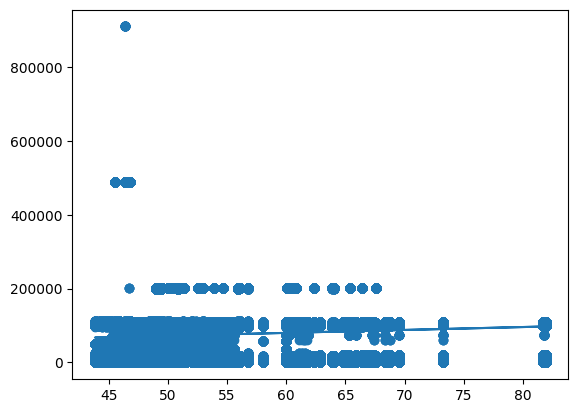

In [46]:
plt.scatter(X, y)
plt.plot(X, predictions)

<font color='blue'>The model is statistically significant based on the F-statistic, but the R-squared values and the diagnostic tests suggest a very weak relationship between "LATITUDE" and "VMV_CODE."
The coefficient for "LATITUDE" is statistically significant, but its magnitude (790.0418) might not be very meaningful due to the weak relationship.
The non-normality and potential autocorrelation issues in the error terms should be investigated further if you need more reliable results from this model.</font>

In [47]:
import seaborn as sns

In [48]:
sns.lmplot(x='LATITUDE', y='VMV_CODE', data=df)

KeyError: "['LATITUDE'] not in index"

<font color='blue'> Interpretation: ......</font>

<font color='blue'> Interpretation: ......</font>

# Part 4 - Modelling <a id="p4"></a>

# Part 6 - Conclusion <a id="p6"></a>